# initializing notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
'My Drive'  'Shared drives'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy

from astropy.table import QTable, Table, Column
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.table import Table
from astropy.io import fits
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from pylab import *

plt.style.use(astropy_mpl_style)

In [ ]:
path_to_data='/content/drive/My Drive/Simons-NSBP/Alyssa/s-nsbp/HFI_SkyMap/'

In [ ]:
!pip install healpy

     |████████████████████████████████| 15.8MB 238kB/s 


In [ ]:
import healpy as hp
from healpy import  *

## initilazing Planck maps

In [ ]:
#setting paths for data
path_to_data = '/content/drive/My Drive/Misc./Simons-NSBP/Alyssa/s-nsbp/ACTPol/'
path_to_data2='/content/drive/My Drive/Misc./Simons-NSBP/Alyssa/s-nsbp/HFI_SkyMap/'

#path to fits file
Planck857 = path_to_data2 + 'HFI_SkyMap_857.fits'

#Planck map at 857Ghz
Planck857,h=hp.read_map(Planck857,h=True)

#path to fits file
#Planck545_file = '/HFI_SkyMap_545.fits'
#Planck545,h=hp.read_map(path_to_data2 + Planck545_file,h=True)

#path to fits file
#Planck353_file = '/HFI_SkyMap_545.fits'
#Planck353,h=hp.read_map(path_to_data2 + Planck353_file,h=True)

#path to fits file
#Planck143_file = '/HFI_SkyMap_143.fits'
#Planck143,h=hp.read_map(path_to_data2 + Planck143_file,h=True)

/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


FileNotFoundError: ignored

\
# * *******NOTES********

## python notes

Defining a function and setting metadata for help.


In [ ]:
def calc_or_sum(a,b):
  '''Returns the sum or different of two floats.

        Parameters:
            a (float)
            b (float)

        Returns:
            sum_or_diff (float)
  '''
  sum_c = a + b
  return sum_c

help(calc_or_sum)  

Help on function calc_or_sum in module __main__:

calc_or_sum(a, b)
    Returns the sum or different of two floats.
    
    Parameters:
        a (float)
        b (float)
    
    Returns:
        sum_or_diff (float)



In [ ]:
#graticule adds meridians and parallels
#hp.graticule()

#spher_coord = SkyCoord(scidata[0][1],scidata[0][2],frame='icrs',unit='deg') 
#gal_coord = spher_coord.galactic
#spher_coord.galactic

## astropy notes


Different ways to initialize a coordinate:

In [ ]:
c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

Coordinate Access:

In [ ]:
c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree)
c.ra
c.ra.hour
c.ra.hms
c.dec 
c.dec.degree 
c.dec.radian   

0.7202828960652683

Converting to Galactic coordinates:

In [ ]:
c_icrs = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
c_icrs.galactic

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>

Specifying distance from the frame origin:

In [ ]:
c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, distance=770*u.kpc)
c.cartesian.x 
c.cartesian.y
c.cartesian.z 

<Quantity 507.88994292 kpc>

Computing on-sky (angular separation) between two coordinates:

In [ ]:
c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, distance=10*u.pc, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, distance=11.5*u.pc, frame='icrs')
c1.separation_3d(c2) 

<Distance 1.52286024 pc>

## spherical harmonics

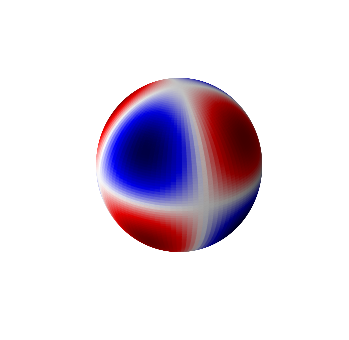

In [ ]:
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()

#SOURCE CREDIT://web

## Kevin's example code

/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


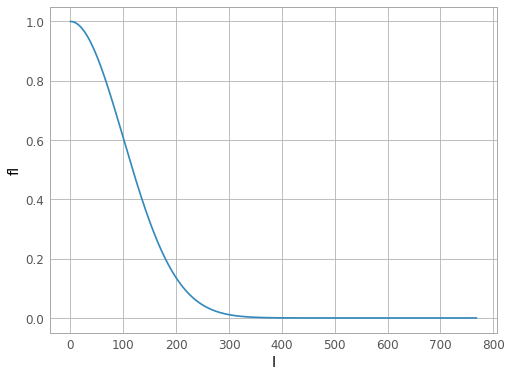

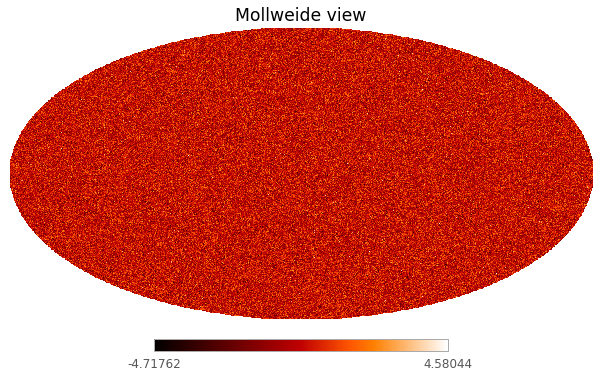

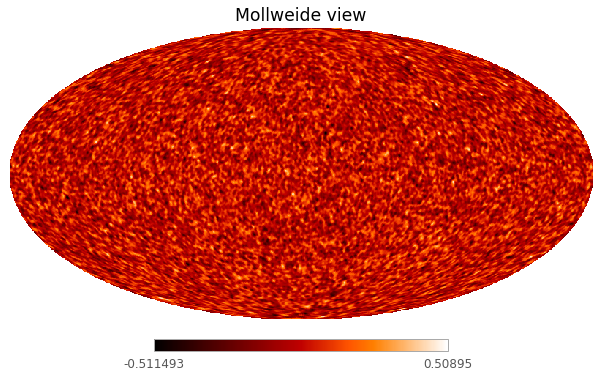

In [ ]:
nside = 256
npix = 12*nside**2

lmax = 3*nside


m = randn(npix)


alm = map2alm(m,lmax = lmax)


l = arange(lmax+1)
sigmal = 100
fl = exp(-l**2/2./sigmal**2)

figure()
plot(l, fl)
xlabel("l")
ylabel("fl")

filtered_alm = almxfl(alm, fl)

filtered_map = alm2map(filtered_alm, nside)

mollview(m)
mollview(filtered_map)

show()

# *******HEALPY*******

## nside and ordering

Approximate resolution at NSIDE 32 is 1.8 deg
The number of pixels NPIX of the map: 


/usr/local/lib/python3.6/dist-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/usr/local/lib/python3.6/dist-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/usr/local/lib/python3.6/dist-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


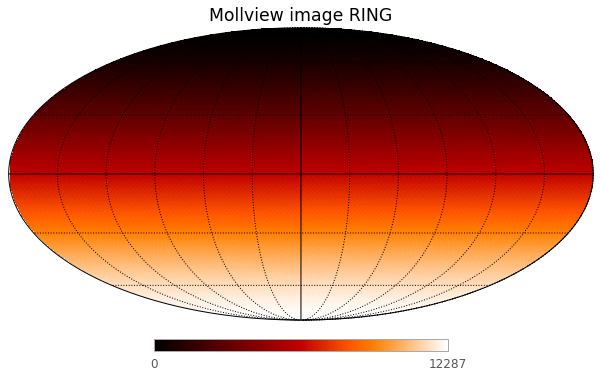

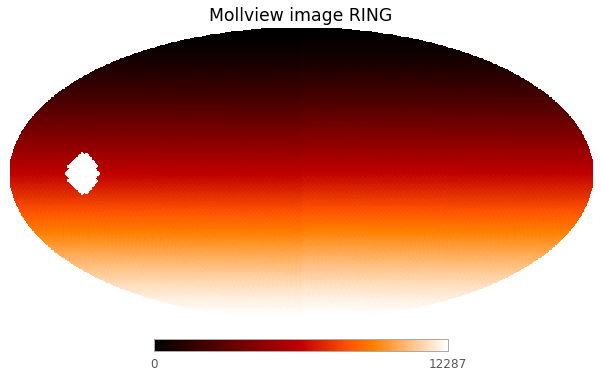

In [ ]:
#the resolution of the map is defined by the NSIDE parameter, which is generally a power of 2.
NSIDE = 32
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

#number of pixels NPIX of the map
NPIX = hp.nside2npix(NSIDE)
print("The number of pixels NPIX of the map: ")

#The same pixels in the map can be ordered in 2 ways, either RING, 
#where they are numbered in the array in horizontal rings starting from the North pole
m = np.arange(NPIX)
hp.mollview(m, title="Mollview image RING")
hp.graticule()

#use vectors to represent coordinates
vec = hp.ang2vec(np.pi / 2, np.pi * 3 / 4)
print(vec)

#find the indices of all the pixels within 10 degrees of that point 
#and then change the value of the map at those indices
ipix_disc = hp.query_disc(nside=32, vec=vec, radius=np.radians(10))

m = np.arange(NPIX)
m[ipix_disc] = m.max()
hp.mollview(m, title="Mollview image RING")


## nside2npix()


In [ ]:
#defines resolutions of map is the parameter nside
# to convert between resolution of pixels within the map
NPIX = hp.nside2npix(nside)
#NPIX = hp.nside2npix(128)

#number of pixels in map, the greater nside greater resolution
NPIX

12288

## ang2pix() and query_disc()

In [ ]:
hp.ang2pix(NSIDE,theta, phi, lonlat=True)

6080

*   ang2pix() 
renders pixel number ipring for a pixel which, given the map 
resolution parameter nside, contains the point on the sphere at angular 
coordinates theta and phi.
*   query_disc()
This IDL facility provides a means to find the index of all pixels within an 
angular distance Radius from a defined center. It's a routine to find the index of all pixels within an angular distance radius from a defined center. The output indices can be either in the RING or NESTED scheme. 
*  ang2pix() & vec2pix() 
routines provide conversion between pixel number in map and (theta,phi) or 
(x,y,z) coordinates on the sphere

In [ ]:
#### -> ang2pix()

hp.ang2pix(16, np.pi/2,0)
print(hp.ang2pix(16, np.pi/2, [0, np.pi/2 + 1e-15]))

print(hp.ang2pix([1, 2, 4, 8, 16], np.pi/2, 0))

print(hp.ang2pix([1, 2, 4, 8, 16], 0, 0, lonlat=True))

[1440 1520]
[   4   12   72  336 1440]
[   4   12   72  336 1440]


In [ ]:
#### -> ang2pix() and radians 
#hp.pixelfunc.ang2pix(nside, np.radians(-dec+90.),np.radians(RA))


## ang2vec()

Vectors can also represent coordinates. Below **vec** is the normalized vector that points to 𝞱 = π/2, ϕ = 3/4π:

In [ ]:
vec = hp.ang2vec(np.pi/2, np.pi*3/4)
print(vec)

[-7.07106781e-01  7.07106781e-01  6.12323400e-17]


## query_polygon(), query_strip()

## pix2ang()

We can retrieve colatitude and longitude of each pixel using ***pix2ang***, in this case we notice that the first 4 pixels cover the North Pole with pixel centers just ~1.5 degrees South of the Pole all at the same latitude. The fifth pixel is already part of another ring of pixels.

In [ ]:
theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0,1,2,3,4]))
print(theta)
print(phi)

[1.46197116 1.46197116 1.46197116 1.46197116 2.92418036]
[ 45.  135.  225.  315.   22.5]


## spherical to galactic conversion

In [ ]:
#### ----> using SkyCoord in astropy [TEST]
#from astropy.coordinates import SphericalRepresentation
#Coordinate frame keyword is optional because default is ICRS (International Celestial Reference System)
c = SkyCoord(scidata[0][1],scidata[0][2],frame='icrs',unit='deg')

#### ----> spherical coordinates [TEST]
#print(c.ra)
#print(c.dec)
#print(c.ra.value)


#### ----> galactic coordinates [TEST]
#print(c.galactic)
#print(c.galactic.representation_type)
#print(c.representation_component_names)
#print(c.represent_as('spherical'))

c.galactic.has_data
c.galactic.data
c.galactic.shape
c.galactic

# * *******PHENOMENA MOLLWEIDE ZOOMS********

## ACT-CL J0102-4915 *El-Gordo*




Gal coord. (ep=J2000) :	297.99465; -67.76902

[Simbad - Basic Data](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=ACT-CL+J0102-4915)

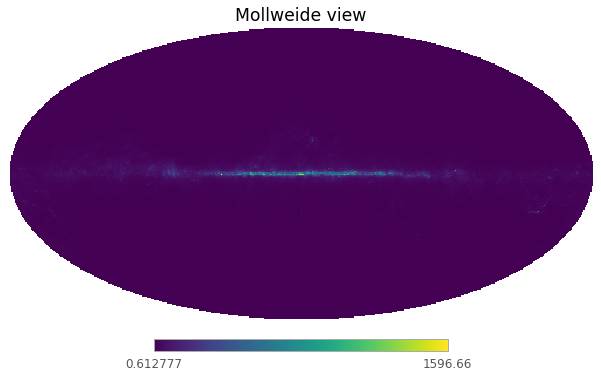

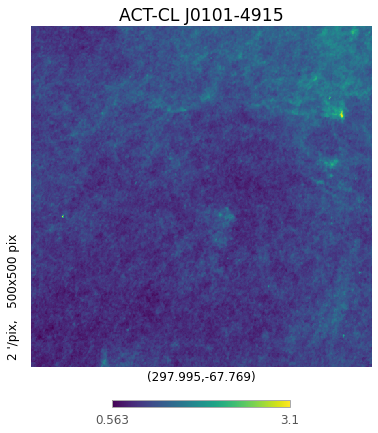

In [ ]:
hp.mollview(
  Planck857,
  norm=None,
  cmap='viridis',
  cbar=True,
  fig=None,
  xsize=500)

hp.gnomview(
    Planck857, 
    rot=[297.99465, -67.76902],
    title = 'ACT-CL J0101-4915',
    xsize=500,
     cmap='viridis',
    reso=2,
    flip='astro')

## Virgo Cluster




Gal coord. (ep=J2000) :	279.6763; +74.4596

[Simbad - Basic Data](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Virgo+Cluster)

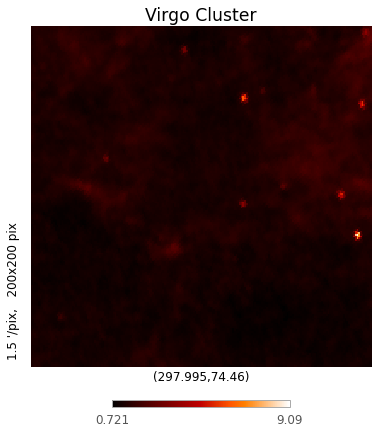

In [ ]:
hp.gnomview(
    Planck857, 
    rot=[297.99465, 74.4596],
    title = 'Virgo Cluster',
    xsize=200,
    reso=1.5,
    flip='astro')

## ACO 1656 *Coma Cluster*

Gal coord. (ep=J2000) :	058.0791; +87.9577

[Simbad - Basic Data](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Coma+Cluster)

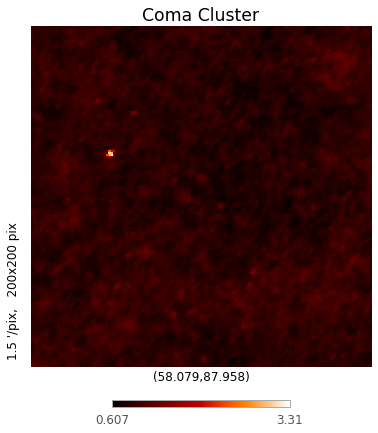

In [ ]:
hp.gnomview(
    Planck857, 
    rot=[058.0791, 87.9577],
    title = 'Coma Cluster',
    xsize=200,
    reso=1.5,
    flip='astro')

## ACO S 373 *Fornax Cluster*

Gal coord. (ep=J2000) :	236.7235; -53.6324 

[Simbad - Basic Data](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Fornax+Cluster)

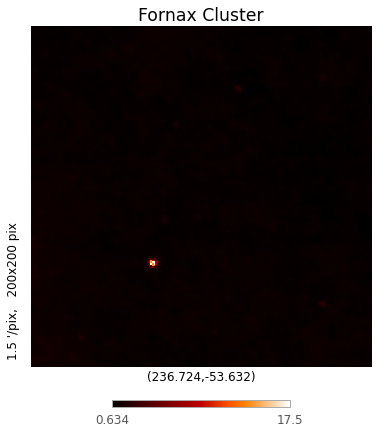

In [ ]:
hp.gnomview(
    Planck857, 
    rot=[236.7235, -53.6324],
    title = 'Fornax Cluster',
    xsize=200,
    reso=1.5,
    flip='astro')

## Sagittarius A*

Gal coord. (ep=J2000) :	359.94422947 -00.04615714

[Simbad - Basic Data](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Sgr+A%2A)

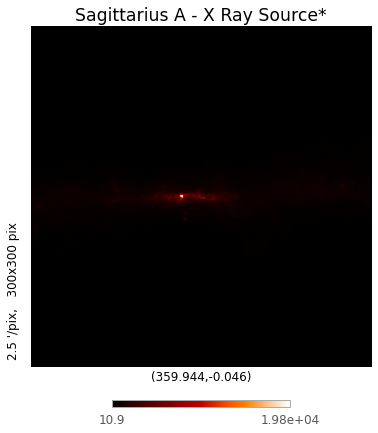

In [ ]:
hp.gnomview(
    Planck857,
    rot=[	359.94422947, -00.04615714],
    title = 'Sagittarius A - X Ray Source*',
    xsize=300,
    reso=2.5,
    flip='astro')

# **IMAGE DETECTION AND VISUALIZATION METHODS ----> ----> ---->**


## **APERTURE PHOTOMETRY**

*Aperture photomtery is where the flux within some radius is summed up.*



LEARNING PYTHON WITH ACT DATA:
1.   Practice binning. Create a seperate table for each clusters rad and dec coordinates.
2.   Convert to galatic coordinates using SkyCoord // astropy.
3.   For each one, run query_disc function. This gives you the number of  pixels nearby.
4.   In a given list of ra and dec, select different discs in the sky and play around with the size of the disc. 

CURRENT GOAL FOR AP: Routinize pixel querying routines, using visualization functions and pixelisation related functions










In [ ]:
#setting paths for data
path_to_data = '/content/drive/My Drive/Simons-NSBP/Alyssa/s-nsbp/ACTPol/'
path_to_data2='/content/drive/My Drive/Simons-NSBP/Alyssa/s-nsbp/HFI_SkyMap/'

#path to fits file
ED56C_file = path_to_data + 'ED56Clusters.fits'
hdulist = fits.open(ED56C_file)
hdulist.info()

scidata = hdulist[1].data
scidata_test = hdulist[1].data[0]                             

#cols = scidata.columns
#cols.info

scidata

Filename: /content/drive/My Drive/Simons-NSBP/Alyssa/s-nsbp/ACTPol/ED56Clusters.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     88   182R x 40C   [19A, D, D, D, D, D, D, K, K, K, 29A, D, D, D, D, 4A, 8A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


('ACT-CL J0001.4-0306', 0.3633377894743717, -3.1016076453278774, 4.34001942556551, 4.097282033350314, 0.6776900764534853, 0.16539990924162565, 0, 0, 0, '', 0.364929315838737, -3.0863595885578, 0.102, 0.0, 'spec', 'SDSS', 3.8832144575201477, 0.23641956738926892, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5178324196909023, 0.8244000290638381, 0.621052291184729, 3.08994187852597, 1.0906957327847562, 0.8061417264063119, 4.980383592333568, 1.6306996232787014, 1.2284688277138438, 6.14639964342803, 2.169572155925054, 1.6035477088325978, 3.702694734839562, 1.3522422925905182, 1.0921989846136169)

# query_disc()

In [ ]:
evt_data = Table(scidata)
#arr = np.arange(15).reshape(5,3)
#t = Table (arr, names=(0,1,2))
#t_act = t[0,1,2]

NSIDE = 32

twi_cmap = cm.twilight
twi_cmap.set_under("w") #sets background to white
#m = np.arange(hp.nside2npix(NSIDE))
#hp.mollview(m, cmap=cool_cmap,title = "Mollview image RING")
#hp.mollview(m, nest=True, title="Mollview image NESTED")

Practicing binning by considering one cluster at a time.



/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/usr/local/lib/python3.6/dist-packages/healpy/fitsfunc.py:428: UserWarn

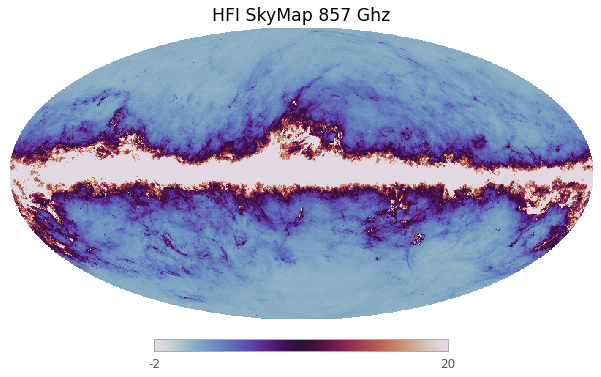

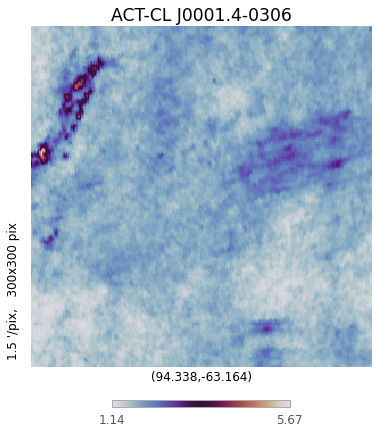

In [ ]:
hp.mollview(
        Planck857,
        #coord=["G","E"],
        #unit=" ",
        fig=None,
        min=-2,
        max=20,
        title='HFI SkyMap 857 Ghz',
        #cbar=True,
        cmap=twi_cmap
        )

#gnomview of Planck map
A1 = hp.gnomview(
    Planck857, 
    rot=[94.3379341,-63.16418415],
    title = scidata[0][0],
    xsize=300,
    reso=1.5,
    flip='astro',
    cmap=twi_cmap)

For each cluster, running query_disc() function.

**query_disc()**: 
This IDL facility provides a means to find the index of all pixels within an 
angular distance Radius from a defined center. It's a routine to find the index of all pixels within an angular distance radius from a defined center. The output indices can be either in the RING or NESTED scheme. 

In [ ]:
#query_disc():
#radius = range of disc (in degrees) #defining how to use the
#+90 (Gabriela suggests add + 90) 
#convert to radians by multiplying by pi/2 or numpy.radians

In [ ]:
#NSIDE = 16
#NPIX = hp.nside2npix(NSIDE)

nside will set the number of pixels in the space

*   theta and phi set at the same time
*   radius is last entry in query_disc()



In [ ]:
nside = 32
#convert to radians and choose specific theta
theta, phi = radians(-30+90.),radians(5) 
r = 20
radius = (np.pi/180.)* r 

In [ ]:
#transferring map information, this map is only zeroes
new_map = np.zeros((NPIX))
new_map[pixel_list] = Planck857[pixel_list]

NameError: ignored

*   Making a new map allows us to make an invisible map underneath, a mask that is made of only zeroes.
*   With pixel_list we have the exact the location of the pixels



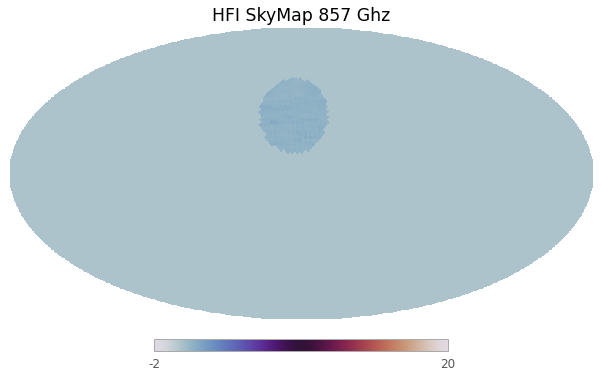

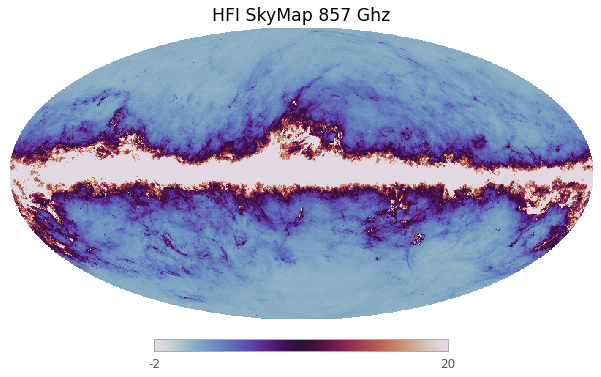

In [ ]:
hp.mollview(
        new_map,
        #coord=["G"], #healpy already in gal coordina
        #unit=" ",
        fig=None,
        min=-2,
        max=20,
        title='HFI SkyMap 857 Ghz',
        #cbar=True,
        cmap=twi_cmap
        )

hp.mollview(
        Planck857,
        #coord=["G","E"],
        #unit=" ",
        fig=None,
        min=-2,
        max=20,
        title='HFI SkyMap 857 Ghz',
        #cbar=True,
        cmap=twi_cmap
        )


## **MATCH FILTERING**

### Defintion / Convolution:

Combination of 

*   signal (stars, galaxies,...)
*   sky (various light in atmosphere, unknown sources???)
*   noise 

Use the process of convolution to render (aka convolve image with true signal):

**EXAMPLE:**
These general steps are from Carlos **BUT** for a flat sky map. 
*  Create your map (pixels or deg with arcmin pixels)
*  Determine correct units ( Jansky versus thermo Kelvin)
*  Convolve map with beam (measured in arcminutes).
*  Check convolution conserves mean of the map.
*  Create map of same size and implement matched filter 


NOTES from Kevin:
*  Don't need to create your own map! ***Look up conversion for (deg with arcmin pixels to pixels) [pay attention to size of pixels, solid angle vs. stradians vs. arcminutes]
*  Match filtered isn't just convolution with beam -- is also a model of the background noise


### How to implement [EXAMPLE 1]

[How to implement a matched filter [EXAMPLE LINK]](https://stackoverflow.com/questions/19468733/how-to-implement-a-matched-filter) (stackoverflow)

In [ ]:
#example of how to implement a matched filter

# A template is given
temp = randn(100,1);

# Create a matched filter based on the template
b = flipud(temp(:));

# For testing the matched filter, create a random signal which
# contains a match for the template at some time index
x = [randn(200,1); temp(:); randn(300,1)];
n = 1:length(x);

# Process the signal with the matched filter
y = filter(b,1,x);

# Set a detection threshold (exmaple used is 90% of template)
thresh = 0.9

# Compute normalizing factor
u = temp.'*temp;

# Find matches
matches = n(y>thresh*u);

# Plot the results
plot(n,y,'b', n(matches), y(matches), 'ro');

# Print the results to the console
display(matches);

SyntaxError: ignored

### How to implement [EXAMPLE 2]

Setting up Matched Filter:
(Python code from Kevin)


#### Making fake data

/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:438: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


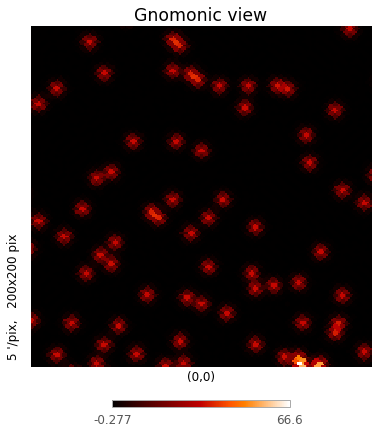

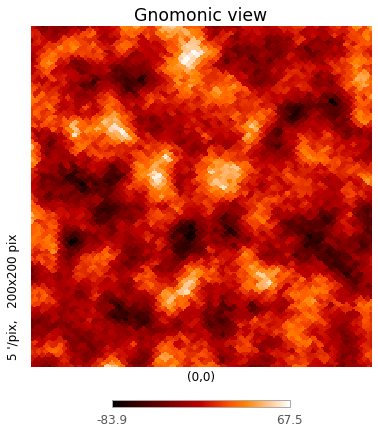

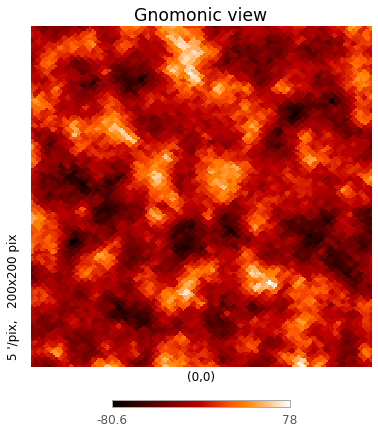

In [ ]:
from healpy import *
from pylab import *

close('all')
###### Real Planck maps #######

(From Carlos to look out for / discuss with Kevin)
#Beam is not perfect gaussian (From planck)
#model of the noise
#mostly Gaussian at high L
#Normalize by the hits map because the level of noise is different (how many observations you have on each pixel) 

########### Make fake data  ###################

nside = 256 #size of numpy array, very low resolution, pehaps go to 1024 (from Carlos)
npix = 12*nside**2 #number of pixels in map
Omegapix = 4*pi/npix #solid angle of single pixel
lmax = 3*nside #maximum l of power spectrum

seed(123123) #What is this seed value?

#multipole, range of 
l = arange(lmax+1)

#inventing power spectra (large scale is the same as small multipole (from Carlos)
Nl = exp(-l/50.) + 1e-3 

#fake noise map, synfast will create a Gaussian realization
n = synfast(Nl, nside)

#this is true map
strue = zeros(npix) 

#This is generating a bunch of random pixels that will simulate light.
randompix = uniform(low=0,high=npix,size=10000).astype(int) 

#This is the flux density (Janksy)
Strue = 3e-3 

#Changing from stradians to thermodynamics units
#you have to convert from flux density to temperature (RJ)
strue[randompix] = Strue/Omegapix

#spherical harmonic transform of gaussian beam
fwhm = 30./60./180*pi
#beam function
#going to give you harmonic tranform WITH normalization
bl = gauss_beam(fwhm,lmax=lmax)

#point source is just a single pixel, you have to convolve because when you 
#observe a delta function its going to be spread out by the beam
#convolution in harmonic space
#strue is map that has point source and you transform to harmonic space (the alm)
#THEN you multiply by the beam which is sbeamlm (multplying beam with harmonic transform) BASIC PROPERTY
#two functions in real space, apply a convolution which transforms into multiplication
struelm = map2alm(strue,lmax=lmax)

sbeamlm = almxfl(struelm,bl)
#(From Carlos)
#transforming back into real space
#sbeamlm = alm object that needs to be transferred back into realspace (multipole)
#alm2map funciton
sbeam = alm2map(sbeamlm,nside)

#(From Carlos)
#just adds noise to map
#data fake observation of point source
#simulated full sky map of an observation with telescope that has beam of 30 arcminutes
data = sbeam + n

reso = 5

gnomview(sbeam,reso=reso)
gnomview(n,reso=reso)
gnomview(data,reso=reso)


#### Analyze with matched filter

/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


49.5530038657188


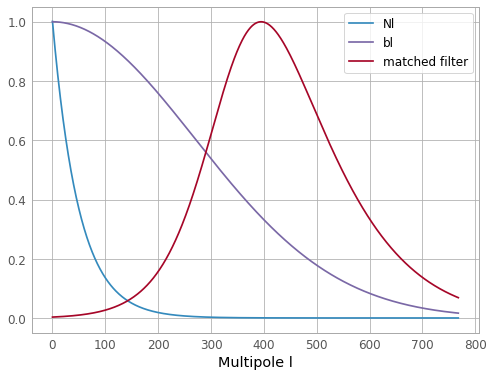

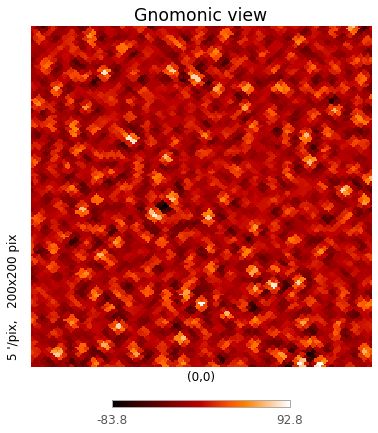

In [ ]:
#########  Analyze with matched filter  ###############

#(From Carlos)
#This normalization (get screencap) is from (p. 6)
#T(k) (get screencap)
normalization = 1.0/sum(bl**2 / Nl) #N1 is power spectra
normalization2 = sum(bl)
mfl = normalization * bl/Nl * normalization2

#have to multiply by size of beam because you are measuring in J/s 
#to get flux in J you have to multiply by size of beam which is integral of gaussian beam
#area of beam is integral in stredians

figure()
plot(l,Nl,label='Nl')
plot(l,bl,label='bl')
plot(l,mfl/amax(mfl),label='matched filter')

xlabel('Multipole l')
legend()

#harmonic transform of data
datalm = map2alm(data,lmax=lmax)

#this is multiplied by your match filter
#this is multiplying match filter with harmonic transform of map (data)
#(pg. 6) This is eqn (1)
filtdatalm = almxfl(datalm,mfl)

#Transforming back into realspace, which is the integral of (eq .1)
#Match filter map
filtdata = alm2map(filtdatalm,nside)

#This will show map with changed reso from above
#Should resemble gaussian noise
gnomview(filtdata,reso=reso)

#If you look at the pixel where you put the fake source - you are going to have the integrated flux.
print(filtdata[randompix[17]])
#show()

#beam is just normalized to the multipole = 1

#(From Carlos)
#Once you have match filter map there will be noise (fitlered out CMB, dust, galaxy only left with point sources)
#(important) NULL PLACES: Only gaussian background of noise and THAT's where you calculate the noise 

# *******ACTPol SZ cluster catalog*******

In [ ]:
#path to fits file
ED56C_file = path_to_data + 'ED56Clusters.fits'
hdulist = fits.open(ED56C_file)
hdulist.info()

scidata = hdulist[1].data
scidata_test = hdulist[1].data[0]                             

#scidata
#galaxy_coords
#cols = scidata.columns
evt_data = Table(scidata)
evt_data

Filename: /content/drive/My Drive/Misc./Simons-NSBP/Alyssa/s-nsbp/ACTPol/ED56Clusters.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     88   182R x 40C   [19A, D, D, D, D, D, D, K, K, K, 29A, D, D, D, D, 4A, 8A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


name,RADeg,decDeg,SNR,SNR2p4,y0tilde,y0tilde_err,H13Match,PSZ2Match,RMMatch,AltName,BCG_RADeg,BCG_decDeg,z,zErr,zType,zSource,deltaSDSS,deltaSDSS_err,deltaS82,deltaS82_err,deltaCFHT,deltaCFHT_err,deltaSOAR,deltaSOAR_err,M500cUPP,M500cUPP_errPlus,M500cUPP_errMinus,M500cUnc,M500cUnc_errPlus,M500cUnc_errMinus,M200mUPP,M200mUPP_errPlus,M200mUPP_errMinus,M200mUnc,M200mUnc_errPlus,M200mUnc_errMinus,M500cCal,M500cCal_errPlus,M500cCal_errMinus
str19,float64,float64,float64,float64,float64,float64,int64,int64,int64,str29,float64,float64,float64,float64,str4,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ACT-CL J0001.4-0306,0.3633377894743717,-3.1016076453278774,4.34001942556551,4.097282033350314,0.6776900764534853,0.16539990924162565,0,0,0,,0.364929315838737,-3.0863595885578,0.102,0.0,spec,SDSS,3.8832144575201477,0.23641956738926892,0.0,0.0,0.0,0.0,0.0,0.0,2.5178324196909023,0.8244000290638381,0.621052291184729,3.08994187852597,1.0906957327847562,0.8061417264063119,4.980383592333568,1.6306996232787014,1.2284688277138438,6.14639964342803,2.169572155925054,1.6035477088325978,3.702694734839562,1.3522422925905182,1.0921989846136169
ACT-CL J0003.1-0605,0.7993028310633576,-6.0877432710973975,8.47323047237678,8.13845699246148,2.0255171965403607,0.24888221421045345,0,1,1,ABELL 2697,0.798264713976209,-6.09170351541407,0.233,0.0,spec,SDSS,13.875160101601907,0.8550668704104694,0.0,0.0,0.0,0.0,0.0,0.0,5.884336604794148,1.3102588836819675,1.0716383323226182,6.844294120574654,1.61670373894933,1.3077885231641562,11.263097178587993,2.507941697963841,2.051202622809826,13.155014323091153,3.1073709673201177,2.513623238674354,8.653436183520805,2.3816493293903367,2.10786158451901
ACT-CL J0005.0-0138,1.26900131447195,-1.6379327691305088,7.088213502101013,6.290219438905551,0.9877497865368101,0.15702946393690057,0,0,0,,1.274189,-1.6449868,0.98,0.05,phot,zC_SOAR,0.0,0.0,0.0,0.0,0.0,0.0,18.039458087485123,2.3585475656601034,2.8019603513555658,0.499108613107855,0.42364535851968377,3.1304117641337714,0.5790056291617387,0.4886282240180322,4.786975128815702,0.8526960477399742,0.7237717670383227,5.361023167130733,0.9915828414010974,0.8368059624256752,4.120529928464067,0.9914780557329549,0.9123793814919761
ACT-CL J0006.0-0231,1.5189660904249536,-2.5285436707890447,4.785422180419786,4.496827897039802,0.7892854721903826,0.17552049806263612,0,0,1,,1.5301026480174,-2.52496881962117,0.618,0.0,spec,SDSS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5779982831421786,0.5573744261010997,0.45829011310836815,2.92214100114307,0.6585500480451938,0.5374314818738375,4.459111198549322,0.9640792088438112,0.7926950878552061,5.068263872277198,1.1422123077867359,0.9321400173160935,3.791173945797321,1.0237021802163833,0.9112227117832107
ACT-CL J0006.9-0041,1.7268515362159462,-0.6864417504007096,5.258594338509001,5.2527198597296465,0.7348603428127204,0.13990092036824198,0,0,1,GMBCG J001.72541-00.68874,1.73388656351599,-0.681063769938731,0.546,0.0,spec,SDSS,6.191737353112887,0.8604670326661312,5.8137528473729025,0.4089876742542948,0.0,0.0,0.0,0.0,2.513848578027603,0.516888948625229,0.4287341074813431,2.7963715622555574,0.5957016375715034,0.49108701987295406,4.382059641873228,0.9010241193119428,0.7473554477026672,4.886040213558917,1.0408567286779131,0.8580658449840063,3.6968361441582394,0.9671731526356201,0.8689904410573958
ACT-CL J0007.3+0341,1.8345032522599922,3.690091510820882,4.928168797656734,4.636858965969836,0.9683367245389761,0.2088346295726596,0,0,1,,1.84312875867749,3.68886335326861,0.507,0.0,spec,SDSS,6.623173119964988,1.0410289990532755,0.0,0.0,0.0,0.0,0.0,0.0,3.018243739680893,0.671306944319755,0.5491638835275091,3.44147230070966,0.8009245046883569,0.649717512123665,5.312222826784396,1.1815255429872331,0.9665491488864427,6.075288182863415,1.4138853239340412,1.1469571098364992,4.438593734824842,1.2207091515587294,1.0806216717656787
ACT-CL J0008.1+0201

## *******ACTPol SZ clusters on HFI SkyMap at 857Ghz*******

 **ACT-CL J0001.4-0306**

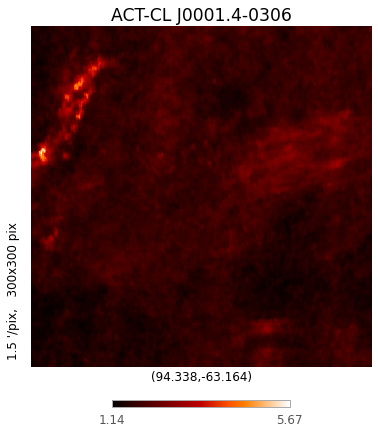

In [ ]:
# XD!!
spher_coord = SkyCoord(scidata[0][1],scidata[0][2],frame='icrs',unit='deg') 
#gal_coord = spher_coord.galactic
spher_coord.galactic

hp.gnomview(
    Planck857, 
    rot=[94.3379341,-63.16418415],
    title = scidata[0][0],
    xsize=300,
    reso=1.5,
    flip='astro')

**ACT-CL J0003.1-0605**

In [ ]:
c = SkyCoord(scidata[1][1],scidata[1][2], unit='deg')
c.galactic

hp.gnomview(
    Planck857, 
    rot=[141.79390379, -61.20343749],
    title = scidata[1][0],
    xsize=300,
    reso=1.5,
    flip='astro')

NameError: ignored

## *******ACTPol SZ clusters on HFI SkyMap at 545Ghz*******

**ACT-CL J0001.4-0306**

In [ ]:
# XD!!
spher_coord = SkyCoord(scidata[0][1],scidata[0][2],frame='icrs',unit='deg') 
#gal_coord = spher_coord.galactic
spher_coord.galactic

hp.gnomview(
    Planck545, 
    rot=[94.3379341,-63.16418415],
    title = scidata[0][0],
    xsize=300,
    reso=1.5,
    flip='astro')

NameError: ignored

**ACT-CL J0003.1-0605**

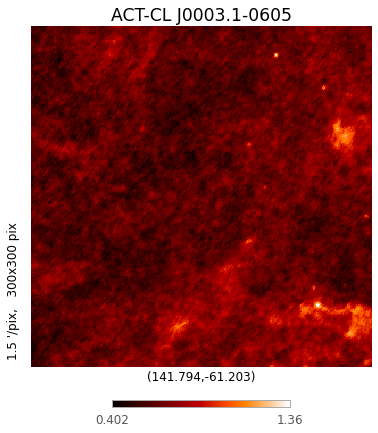

In [ ]:
c = SkyCoord(scidata[1][1],scidata[1][2], unit='deg')
c.galactic

hp.gnomview(
    Planck545, 
    rot=[141.79390379, -61.20343749],
    title = scidata[1][0],
    xsize=300,
    reso=1.5,
    flip='astro')

## *******ACTPol SZ clusters on HFI SkyMap at 353Ghz*******

**ACT-CL J0001.4-0306**

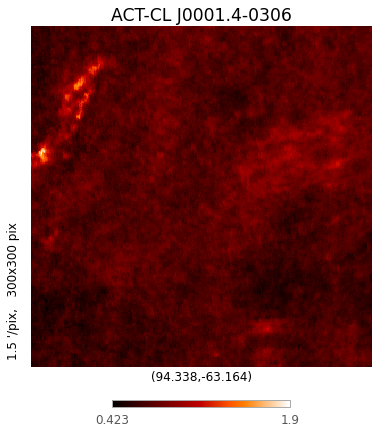

In [ ]:
# XD!!
spher_coord = SkyCoord(scidata[0][1],scidata[0][2],frame='icrs',unit='deg') 
#gal_coord = spher_coord.galactic
spher_coord.galactic

hp.gnomview(
    Planck353, 
    rot=[94.3379341,-63.16418415],
    title = scidata[0][0],
    xsize=300,
    reso=1.5,
    flip='astro')

**ACT-CL J0003.1-0605**

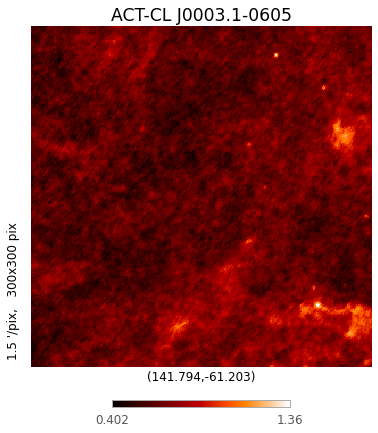

In [ ]:
c = SkyCoord(scidata[1][1],scidata[1][2], unit='deg')
c.galactic

hp.gnomview(
    Planck353, 
    rot=[141.79390379, -61.20343749],
    title = scidata[1][0],
    xsize=300,
    reso=1.5,
    flip='astro')

## *******ACTPol SZ clusters on HFI SkyMap at 143Ghz*******

**ACT-CL J0001.4-0306**

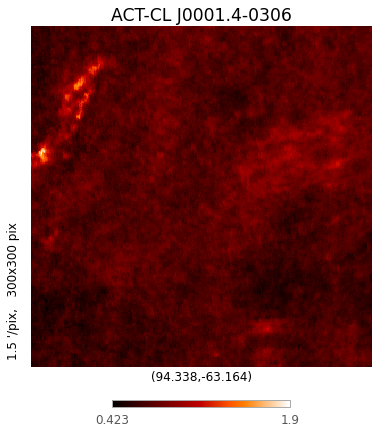

In [ ]:
# XD!!
spher_coord = SkyCoord(scidata[0][1],scidata[0][2],frame='icrs',unit='deg') 
#gal_coord = spher_coord.galactic
spher_coord.galactic

hp.gnomview(
    Planck143, 
    rot=[94.3379341,-63.16418415],
    title = scidata[0][0],
    xsize=300,
    reso=1.5,
    flip='astro')

**ACT-CL J0003.1-0605**

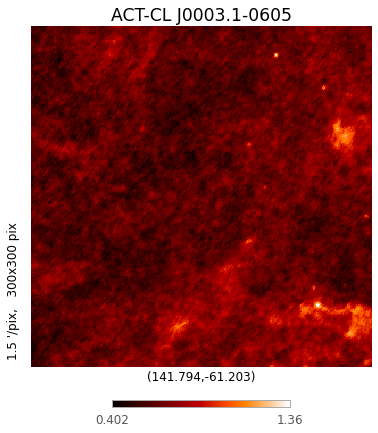

In [ ]:
c = SkyCoord(scidata[1][1],scidata[1][2], unit='deg')
c.galactic

hp.gnomview(
    Planck143, 
    rot=[141.79390379, -61.20343749],
    title = scidata[1][0],
    xsize=300,
    reso=1.5,
    flip='astro')


# *******CURRENT PROJECT*******

 **Working to create loop to run through SZ clusters and print gnomview of region along with total flux.**


# Code from Kevin:

In [ ]:
# minimal example of single coordinate transformation to galactic

c = SkyCoord(0,0, unit= 'deg' )

l = c.galactic.l # astropy data type "Longitude"
b = c.galactic.b # astropy data type "Latitude"

ldeg = l.degree # value in degrees
bdeg = b.degree

lrad = l.radian # value in radians
brad = l.radian

# try to do several points at once

# make lists of 10 (RA, dec) values 
RAs = linspace(-180,180, 10)
decs = linspace(-90, 90, 10)
 
cs = SkyCoord(RAs, decs, unit= 'deg' )

lsdeg = cs.galactic.l.degree
bsdeg = cs.galactic.b.degree

# Code from Carlos:

From Carlos on Matched Filters for Full Sky Maps:

/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:438: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 12.739827 arcmin (0.003706 rad) 
  sigma * 60 * 180 / np.pi, sigma
/usr/local/lib/python3.6/dist-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 30.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


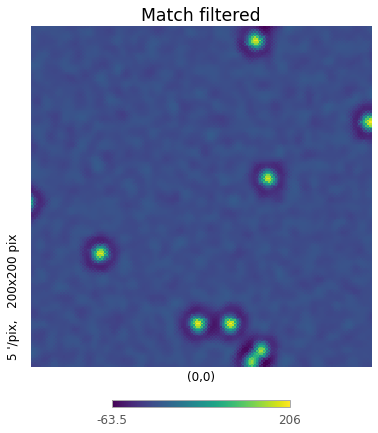

In [ ]:
import matplotlib.pyplot as pl
import numpy as np
import healpy as hp
from astropy.convolution import convolve, Gaussian2DKernel
from astropy.cosmology import Planck15
from astropy import units as u

#sigma = 30.0/2.355 / 0.5
#kernel = Gaussian2DKernel(sigma)
#b_area = np.sum(kernel.array / np.max(kernel.array) )*np.radians(0.5/60.0)**2 
#print(b_area)
#OmegaB = (np.pi / 4 / np.log(2)) * np.radians(30.0/60)**2
#print(OmegaB)

T_cmb = 2.725
c  = 299792458.0
h  = 6.62606957e-34
k  = 1.3806488e-23

nside = 512
npix = 12*nside**2
# soild angle of a single pixel
Omega_p = 4 * np.pi / npix

ell_arr = np.arange(3*nside)

# This is the noise spectra, which is an exponential term plus a white noise term
Nell = 1e-4 * np.exp( -ell_arr/50.0 ) + 1e-6
#Nl = exp(-l/50.) + 1e-3

# create a noise realization
noise_map = hp.synfast(Nell,nside,pol=False)

signal_map = np.zeros((npix)) #*u.mJy/u.sr
# put a 200 mJy point source in 1k random pixels
pixels = np.random.uniform(low=0,high=npix,size=1000).astype(int)
signal_map[pixels] = 200.0 / Omega_p #*u.mJy/u.sr # units of mJy/sr

#equiv = u.thermodynamic_temperature(90*u.GHz, Planck15.Tcmb0)
#s = signal_map.to(u.uK, equivalencies=equiv)

# Now lets transform to uK thermo units
# I dont do it with the units module because healpy wont let me run arrays that have units in them, so I have to do it manually
# This is taken from the flux_factor function in pixell, https://github.com/simonsobs/pixell/blob/136bdc41d71687aec9726ba041f40312d9f891fc/pixell/utils.py#L1618
freq = 90e9 # We assume that we are working at 90 GHz
x     = h*freq/(k*T_cmb)
dIdT  = 2*x**4 * k**3*T_cmb**2/(h**2*c**2)/(4*np.sinh(x/2)**2)
dJydK = dIdT * 1e26 / 1e3 # This is the factor between spectral radiance and temperature. The 1e26 is because 1 Jy = 1e-26 Watt/meter^2/Hertz , and the 1/1e3 is because we want to work from 
# mJy/sr to uK, so 1e3/1e6 = 1/1e3. You can check this conversion using the astropy units module which has a built in unit convertor, and it seems to be ok.
# I divide because I am going from mJy/sr to uK, not the other way around.
s = signal_map / dJydK
# now s in in units of uK thermo

# We will "observe" with a 30 arcmin beam
fwhm = 30.0
# smoothing convolves the map with a gaussian beam, and it DOES mantain the average of the map
signal_conv_map = hp.smoothing(s,fwhm = np.radians(fwhm/60.0),pol=False)

#print(np.sum(signal_map),np.sum(signal_conv_map))

b_ell = hp.gauss_beam(np.radians(fwhm/60.0),pol=False,lmax=(3*nside-1))

# Sum the point sources map and the noise map
total_map = signal_conv_map + noise_map

norm2 = np.sum( (2*ell_arr + 1 ) * b_ell ) / (4*np.pi) 

# These 2 lines are in Kevins code
#normalization =  4*pi/sum((2*l+1) * bl**2 / Nl) #  ????
#mfl = normalization * bl/Nl

# Matched filter, I use the noise spectra as the filter
# this is the denominator in the matched filter equation
norm  = np.sum( (2*ell_arr + 1 ) * b_ell**2 / Nell) / (4*np.pi) 
#norm  = np.sum( b_ell**2 / Nell) 

# This is the filter 
f_ell =  norm2 * b_ell / Nell / norm

# I need the harmonic transform of the map
alms_tot = hp.map2alm(total_map,pol=False)
# I multiply the alms with the matched filter
alms_tot = hp.almxfl(alms_tot,f_ell)
# transform back to real space
total_MF_map = hp.alm2map(alms_tot,nside)

#The beam area Omega_B, in sr
OmegaB = (np.pi / 4 / np.log(2)) * np.radians(fwhm/60)**2

# total_MF_map is in uK/sr, so we need to transform back to mJy/sr now 
# multiplying for the dJydK factor, 
# and also multiplying by the beam solid angle in sr
total_MF_map = total_MF_map*dJydK*OmegaB

# Now total_MF_map is in mJy
hp.gnomview(
    total_MF_map,
    reso=5,
    title="Match filtered",
    cmap='viridis')
pl.show()



# ACT data

Testing printing of first SZ cluster in ACT data.

In [ ]:
#RADeg coordinate
print ("This is J0001.4-0.306 RADeg coordinate:", scidata[0][1])
#decDeg coordinate
print ("This is J0001.4-0.306 decDeg coordinate:", scidata[0][2])
#galactic coordinates
spher_coord = SkyCoord(scidata[0][1],scidata[0][2],frame='icrs',unit='deg') 
print ("This is J0001.4-0.306 galactic coordinates:", spher_coord.galactic)

spher_coord = SkyCoord(scidata[0][1],scidata[0][2], frame='icrs',unit='deg') 
sz_gal = spher_coord.galactic

This is J0001.4-0.306 RADeg coordinate: 0.3633377894743717
This is J0001.4-0.306 decDeg coordinate: -3.1016076453278774
This is J0001.4-0.306 galactic coordinates: <SkyCoord (Galactic): (l, b) in deg
    (94.3379341, -63.16418415)>


List of ACT SZ clusters converted to galactic coordinates.

In [ ]:
A = 1
SZ_RADeg = [sub[A] for sub in scidata]
print(SZ_RADeg)

B = 2
SZ_decDeg = [sub[B] for sub in scidata]
print(SZ_decDeg)

E = 5
largeSZ = [sub[E] for sub in scidata]
largeSZ.sort(reverse=True)

SZ_list = SkyCoord(SZ_RADeg,SZ_decDeg,frame='icrs',unit='deg')
SZ_list.galactic


[0.3633377894743717, 0.7993028310633576, 1.26900131447195, 1.5189660904249536, 1.7268515362159462, 1.8345032522599922, 2.0440306094941434, 2.2174847947200647, 3.0257918089627367, 3.2008210169824167, 3.3257627782645045, 3.7248589460398875, 4.560244020381731, 4.905830139706694, 4.961916336539701, 5.143910161649302, 5.550638455897143, 6.150877622149267, 6.559738732605695, 6.77594060490901, 6.799067321289044, 7.867449521518523, 8.404990758192042, 8.466436908554101, 8.606686276082797, 8.738271520151756, 9.648591286818913, 10.232720937915474, 11.104982690567368, 11.11331246666873, 11.302450258389257, 11.51333333333335, 12.939775213890073, 13.384163306723678, 14.521515954320591, 14.780750254225723, 14.892374089853291, 15.292493622121185, 16.225850760883333, 16.254999999999995, 16.543521340828363, 16.698544351341326, 17.00333350158337, 17.757694110772405, 18.950780906156638, 19.999032529219505, 20.100887873307812, 21.24840255328263, 21.26038603185205, 21.324056142754017, 21.818719124675482, 21

<SkyCoord (Galactic): (l, b) in deg
    [( 94.3379341 , -63.16418415), ( 92.16795831, -66.03509233),
     ( 97.43240739, -62.19218737), ( 97.1876104 , -63.11030619),
     ( 99.08194366, -61.47888918), (102.1896498 , -57.39488316),
     (101.55294243, -59.04041184), (101.40084324, -59.79744764),
     (101.59907347, -62.00241213), ( 94.48635834, -69.63691654),
     (102.8528501 , -61.15568634), (102.90059595, -62.39279067),
     (104.97063569, -62.09112954), (107.68659534, -58.319553  ),
     (107.12804066, -59.72492981), (107.70144885, -59.30238578),
     (106.90762452, -62.55913002), (108.48312078, -62.08327511),
     (109.89864494, -60.89333269), (104.44409058, -70.71014165),
     (107.26819898, -67.07121171), (111.42014429, -64.16226889),
     (114.04744399, -59.84634147), (109.92849793, -70.2925119 ),
     (114.36688572, -60.16652041), (114.66605086, -60.04088061),
     (116.09045558, -61.95543814), (116.41820257, -66.2185749 ),
     (119.24140448, -61.6046288 ), (119.33188511, -60.

Notes from Kevin:

Make a matched filter map of Planck Map (857Ghz)
[Even if filter isn't right...still shoudl work]
[Using Planck sized beam = equivalent to Planck Map, good start]

Do the for loop for SZ clusters.

Make a couple of arrays for the flux density and the error. 
[Fill with zeroes...see Kevin's notes]

Get clustervalue from ang2pix...hp.ang2pix(16, np.pi/2,0)

[Know the resolution in order to know the correct pixel size]




```
# theta, phi = np.degrees(hp.pix2ang(nside=32, ipix=[0,1,2,3,4]))
print(theta)
print(phi)
```



# Notes & Plan from Kevin

*ACT Project Outline*

1. Make a match filtered planck map
2. Then, planck_map -> filter_planck_map
3. Make arrays for the flux density and the error of flux density (e.g. S = zeros(Nclusters) )
4. Loop over clusters (enumerated by i)

**Considering the particular cluster, figure out the flux value and the error, and store in those arrays**

> * Get the cluster’s pixel value from ang2pix using the cluster (l,b) which is a lat and long measured in degrees.  Theta = 90 - b in degs and phi = l, but then theta and phi have to be converted to radians.

> * Get flux value from the match-filtered map at the cluster pixe, store in pre-made array 
flux[ith_cluster] = filtered_planck_map[the_pixel_of_cluster]

> * Get an array of pixel indices from query_disc that are 3 degrees from the cluster.  Take standard deviation of those pixels values to estimate error…  Store in pre-made array
	err[ith_cluster] = std( filtered_planck_map[list_of_pixels_near_cluster] )

**End loop over clusters**


In [ ]:
S = zeros(3)
a = np.array([1.0,4.0,5.0], dtype = np.float32)
b = [2,4,5] * u.T
c = [1.0,2.0,2.0]


t = QTable([S,a,b,c],
    names = ('S','SZ Cluster','Flux Density','Flux Density ERROR'),
    meta = {'name': 'first table'})

print(t)

 S  SZ Cluster Flux Density Flux Density ERROR
                    T                         
--- ---------- ------------ ------------------
0.0        1.0          2.0                1.0
0.0        4.0          4.0                2.0
0.0        5.0          5.0                2.0


## **ACT-CL J0003.1-0605**

NameError: ignored

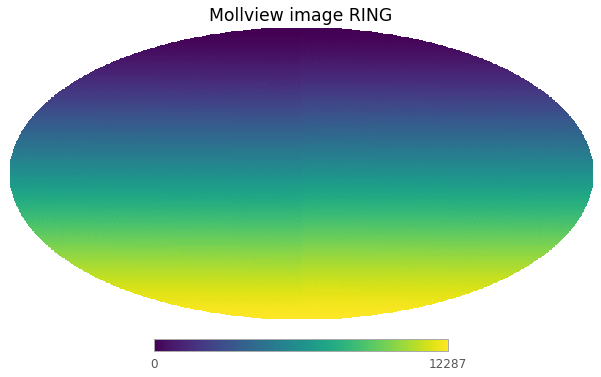

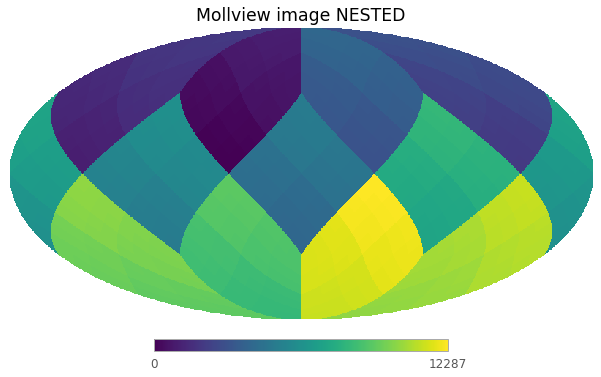

In [ ]:
#setting the size of the maps
nside = 32

#number of pixels inside the map
npix = hp.nside2npix(nside)

#creates an array of all the pixels aka pixel list
m = np.arange(hp.nside2npix(nside))

#changing color scheme of map 
vir_cmap = cm.viridis

#sets background to white
vir_cmap.set_under("w") 

#mollviews of map (RING and NESTED) 
hp.mollview(m,
            cmap = vir_cmap, 
            title = "Mollview image RING")

hp.mollview(m,
            nest=True,
            cmap = vir_cmap, 
            title="Mollview image NESTED")

#creating a new map of only zeros
zero_map = np.zeros((npix))

#defining theta, phi and the radius of the disc - then converting from degrees to radians
theta = radians(-30+90.0)
phi = radians(5)
radius = (np.pi/180)*20


#coordinates of vector corresponding to input pixels:
vec = hp.ang2vec(np.array(coord.l.value),np.array(coord.b.value),lonlat=True)





In [ ]:


#Define a radius of the disc you want to. Input is in degrees and we have to convert it into radians:
radius = 20*np.pi/180

#Astropy convert ra and dec into galactic coordinates:
coord= SkyCoord(ra=ra, dec=dec, unit='deg').transform_to('galactic') 

#convert to radians and choose specific theta
theta, phi = radians(-30+90.),radians(5) 
r = 20
radius = (np.pi/180.)* r




hp.mollview(
        new_map,
        #coord=["G"], #healpy already in gal coordina
        #unit=" ",
        fig=None,
        min=-2,
        max=20,
        title='HFI SkyMap 857 Ghz',
        #cbar=True,
        cmap=twi_cmap
        )

hp.mollview(
        Planck857,
        #coord=["G","E"],
        #unit=" ",
        fig=None,
        min=-2,
        max=20,
        title='HFI SkyMap 857 Ghz',
        #cbar=True,
        cmap=twi_cmap
        )

c = SkyCoord(scidata[1][1],scidata[1][2], unit='deg')
c.galactic

hp.gnomview(
    Planck857, 
    rot=[141.79390379, -61.20343749],
    title = scidata[1][0],
    xsize=300,
    reso=1.5,
    flip='astro')

In [ ]:
#Define a radius of the disc you want to. Input is in degrees and we have to convert it into radians:
radius = 20*np.pi/180

#Astropy convert ra and dec into galactic coordinates:
coord= SkyCoord(ra=ra, dec=dec, unit='deg').transform_to('galactic') 

#coordinates of vector corresponding to input pixels:
vec = hp.ang2vec(np.array(coord.l.value),np.array(coord.b.value),lonlat=True)  

#doing the query_disc:
list_pixels = hp.query_disc(nside,vec,radius)
new_map = np.zeros((NPIX))

#finally select only the disc in the map:
new_map[list_pixels ] = Planck857[list_pixels]

#take a look in the new map:
hp.mollview(new_map)

NameError: ignored